In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import  LabelEncoder , StandardScaler
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Shape

df.shape

(200, 5)

In [11]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# Checking the null values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

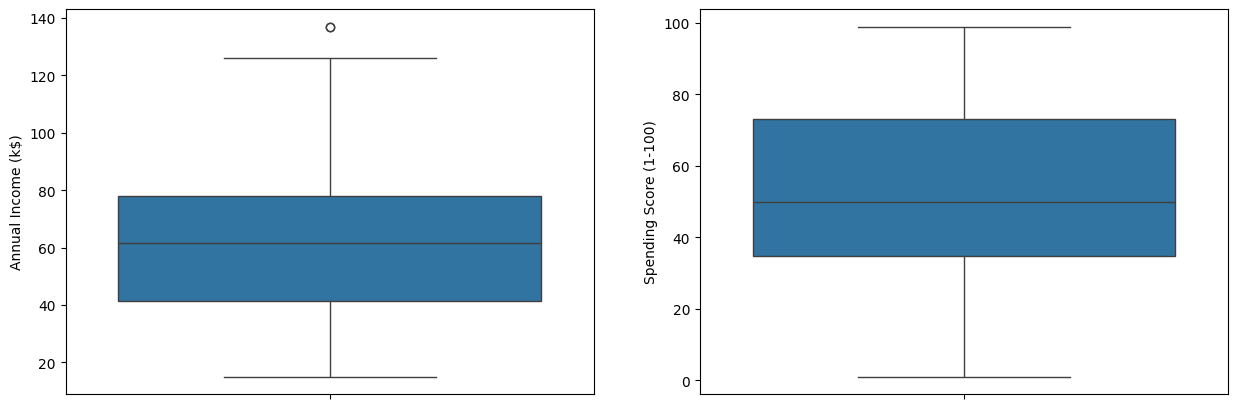

In [15]:
#Finding Outliers

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

In [16]:
# Handling categorical columns
label=LabelEncoder()
df['Genre'] = label.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


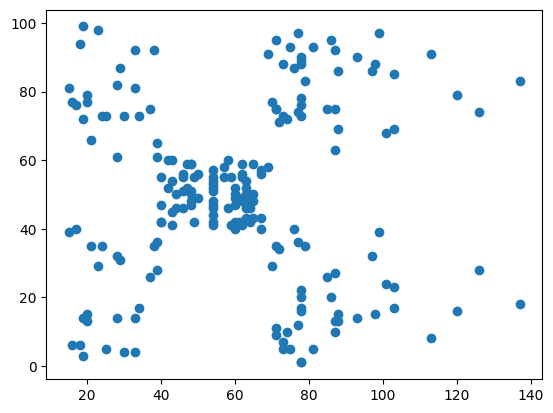

In [17]:
df = df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
plt.scatter(df['income'],df['score'])

In [18]:
X = df[['income', 'score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
val=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X_scaled)
    val.append(kmeans.inertia_)
print(val)


[400.00000000000006, 272.4598145822962, 157.7040081503594, 109.22822707921344, 65.56840815571681, 55.10377812115058, 44.91118554999014, 39.513420485314334, 32.421683532347444, 29.685787841036316, 26.39469272212546, 24.26450800337065, 22.08910649338486, 19.51429566454985]


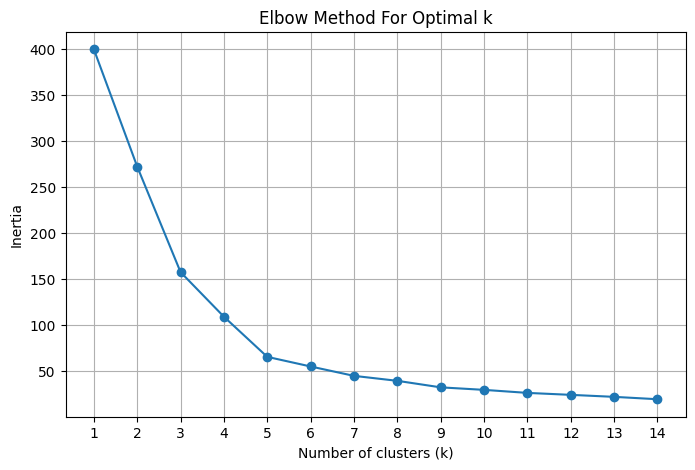

In [20]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 15), val, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [22]:
y_kmeans = kmeans.fit_predict(X_scaled)

In [23]:
df['Cluster'] = y_kmeans
df['Cluster'] 

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

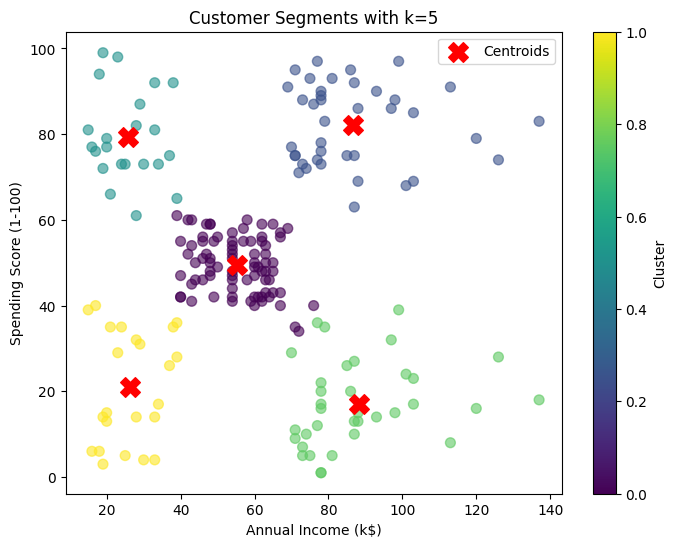

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X['income'], X['score'], 
            c=y_kmeans, cmap='viridis', s=50, alpha=0.6)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments with k=5')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()